In [ ]:
#7장


# 개인

In [23]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

In [24]:
np.unique(y, return_counts=True)

(array([0, 1]), array([212, 357], dtype=int64))

In [25]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler= StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled= scaler.fit_transform(X_test)

In [26]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report

train_acc=[]
test_acc =[]

k_params = range(1,10)
for k in k_params:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train_scaled, y_train)
    
    pred_train_knn = knn.predict(X_train_scaled)
    pred_test_knn = knn.predict(X_test_scaled)
    
    train_acc.append(accuracy_score(y_train, pred_train_knn))
    test_acc.append(accuracy_score(y_test, pred_test_knn))
    

In [31]:
df = pd.DataFrame({
    'k' : k_params,
    'train_acc': train_acc,
    'test_acc': test_acc
})
df

,k,train_acc,test_acc
0,1,1.000000,0.972028
1,2,0.981221,0.958042
2,3,0.981221,0.979021
3,4,0.985915,0.979021
4,5,0.981221,0.972028
5,6,0.981221,0.965035
6,7,0.974178,0.972028
7,8,0.974178,0.965035
8,9,0.974178,0.965035


In [32]:
df.set_index('k', inplace=True)
df

,train_acc,test_acc
k,,
1,1.000000,0.972028
2,0.981221,0.958042
3,0.981221,0.979021
4,0.985915,0.979021
5,0.981221,0.972028
6,0.981221,0.965035
7,0.974178,0.972028
8,0.974178,0.965035
9,0.974178,0.965035


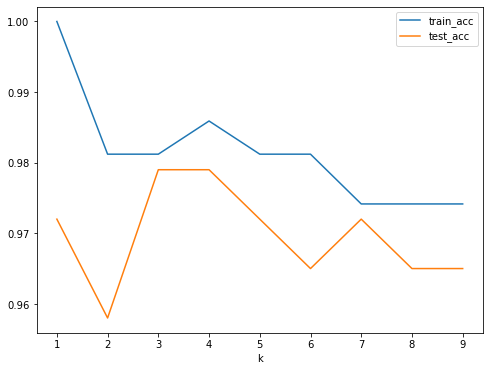

In [33]:
import matplotlib.pyplot as plt

df.plot(figsize=(8,6))
plt.show()

In [36]:
best_model = KNeighborsClassifier(n_neighbors=3)
             
best_model.fit(X_train_scaled, y_train)

pred_train = best_model.predict(X_train_scaled)
pred_test = best_model.predict(X_test_scaled)

print(accuracy_score(y_train, pred_train))
print(accuracy_score(y_test, pred_test))

0.9812206572769953
0.9790209790209791


In [46]:
#gridsearch pipline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

In [54]:
order = [
    ('scaler', MinMaxScaler()),
    ('knn', KNeighborsClassifier())
]
pipeline = Pipeline(order, verbose=True)
param = {
    "knn__n_neighbors":range(1,11), 
    "knn__p":[1,2] 
}
gs = GridSearchCV(pipeline, param, scoring='accuracy', cv=5, n_jobs=-1)
gs

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('knn', KNeighborsClassifier())],
                                verbose=True),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': range(1, 11), 'knn__p': [1, 2]},
             scoring='accuracy')

In [56]:
gs.fit(X_train, y_train)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing knn, total=   0.0s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('knn', KNeighborsClassifier())],
                                verbose=True),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': range(1, 11), 'knn__p': [1, 2]},
             scoring='accuracy')

In [60]:
result_df = pd.DataFrame(gs.cv_results_)
result_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,param_knn__p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001796,0.000399,0.003789,0.000746,1,1,"{'knn__n_neighbors': 1, 'knn__p': 1}",0.918605,0.952941,0.988235,0.964706,0.988235,0.962544,0.025875,17
1,0.001396,0.000489,0.005643,0.002515,1,2,"{'knn__n_neighbors': 1, 'knn__p': 2}",0.953488,0.941176,0.964706,0.952941,0.941176,0.950698,0.008836,20
2,0.002593,0.001017,0.005404,0.000499,2,1,"{'knn__n_neighbors': 2, 'knn__p': 1}",0.953488,0.976471,0.988235,0.964706,0.941176,0.964815,0.016562,16
3,0.001613,0.001007,0.002411,0.001969,2,2,"{'knn__n_neighbors': 2, 'knn__p': 2}",0.953488,0.964706,0.964706,0.964706,0.941176,0.957756,0.009359,19
4,0.000000,0.000000,0.000000,0.000000,3,1,"{'knn__n_neighbors': 3, 'knn__p': 1}",0.988372,0.964706,0.964706,0.964706,0.976471,0.971792,0.009460,6
5,0.000000,0.000000,0.003125,0.006249,3,2,"{'knn__n_neighbors': 3, 'knn__p': 2}",0.976744,0.976471,0.952941,0.952941,0.976471,0.967114,0.011572,12
6,0.000000,0.000000,0.006249,0.007653,4,1,"{'knn__n_neighbors': 4, 'knn__p': 1}",1.000000,0.988235,0.964706,0.976471,0.976471,0.981176,0.011998,1
7,0.003125,0.006249,0.006249,0.007653,4,2,"{'knn__n_neighbors': 4, 'knn__p': 2}",0.976744,0.988235,0.952941,0.964706,0.976471,0.971819,0.012020,5
8,0.000000,0.000000,0.003124,0.006248,5,1,"{'knn__n_neighbors': 5, 'knn__p': 1}",0.988372,0.988235,0.964706,0.964706,0.988235,0.978851,0.011549,2
9,0.000000,0.000000,0.006248,0.007652,5,2,"{'knn__n_neighbors': 5, 'knn__p': 2}",1.000000,0.976471,0.952941,0.941176,0.988235,0.971765,0.021820,8


In [61]:
result_df[result_df.columns[6:]].sort_values('rank_test_score').head()

,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,"{'knn__n_neighbors': 4, 'knn__p': 1}",1.000000,0.988235,0.964706,0.976471,0.976471,0.981176,0.011998,1
8,"{'knn__n_neighbors': 5, 'knn__p': 1}",0.988372,0.988235,0.964706,0.964706,0.988235,0.978851,0.011549,2
10,"{'knn__n_neighbors': 6, 'knn__p': 1}",1.000000,0.988235,0.964706,0.952941,0.988235,0.978824,0.017291,3
12,"{'knn__n_neighbors': 7, 'knn__p': 1}",1.000000,0.976471,0.952941,0.964706,0.988235,0.976471,0.016638,4
7,"{'knn__n_neighbors': 4, 'knn__p': 2}",0.976744,0.988235,0.952941,0.964706,0.976471,0.971819,0.012020,5


In [63]:
gs.best_params_

{'knn__n_neighbors': 4, 'knn__p': 1}

In [65]:
best_model = gs.best_estimator_
best_model

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=4, p=1))],
         verbose=True)

In [66]:
pred_test = best_model.predict(X_test)
accuracy_score(y_test, pred_test)

0.958041958041958

# 개인 iris dataset 분류

- model: KNN 사용
- gridsearch를 이용해서 최적의 K값 찾는다.

In [181]:
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris

In [182]:
##### 데이터셋 로드 및 분리

In [183]:
iris_data = load_iris()
X,y = iris_data.data, iris_data.target

#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)


In [184]:
##### Pipeline 생성

In [198]:
order = [
    ("scaler", StandardScaler()),
    #('scaler', MinMaxScaler()),
    ('knn', KNeighborsClassifier())
]
pipline = Pipeline(order)#, verbose=True)
pipline

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [186]:
##### GridSearchCV 생성 및 학습

In [199]:
#파라미터명이 반드시 이래야 함 이렇게 안하면 오류남
param = {
    #반드시 knn__n_neighbors 
    "knn__n_neighbors":range(1,11), 
    "knn__p":[1,2] 
}
my_gs = GridSearchCV(pipline, param, cv=5)#, n_jobs=-1,scoring='accuracy', cv=5)
my_gs

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': range(1, 11), 'knn__p': [1, 2]})

In [200]:
my_gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': range(1, 11), 'knn__p': [1, 2]})

In [189]:
##### 결과 확인

In [201]:
result_df = pd.DataFrame(my_gs.cv_results_)
result_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,param_knn__p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000802,0.000402,0.001598,4.771803e-04,1,1,"{'knn__n_neighbors': 1, 'knn__p': 1}",0.958333,0.958333,0.875000,0.958333,0.875000,0.925000,0.040825,12
1,0.000598,0.000488,0.001398,4.892727e-04,1,2,"{'knn__n_neighbors': 1, 'knn__p': 2}",0.958333,0.958333,0.916667,0.916667,0.916667,0.933333,0.020412,7
2,0.000598,0.000488,0.000997,6.503192e-07,2,1,"{'knn__n_neighbors': 2, 'knn__p': 1}",0.916667,0.958333,0.916667,0.916667,0.875000,0.916667,0.026352,20
3,0.000792,0.000396,0.001002,1.091676e-05,2,2,"{'knn__n_neighbors': 2, 'knn__p': 2}",0.958333,0.958333,0.916667,0.916667,0.875000,0.925000,0.031180,12
4,0.000599,0.000489,0.001098,2.017041e-04,3,1,"{'knn__n_neighbors': 3, 'knn__p': 1}",0.916667,0.958333,0.916667,0.958333,0.916667,0.933333,0.020412,7
5,0.000000,0.000000,0.000000,0.000000e+00,3,2,"{'knn__n_neighbors': 3, 'knn__p': 2}",0.958333,0.958333,0.875000,0.958333,0.916667,0.933333,0.033333,7
6,0.000000,0.000000,0.000000,0.000000e+00,4,1,"{'knn__n_neighbors': 4, 'knn__p': 1}",0.875000,0.958333,0.916667,0.958333,0.916667,0.925000,0.031180,12
7,0.000000,0.000000,0.000000,0.000000e+00,4,2,"{'knn__n_neighbors': 4, 'knn__p': 2}",0.916667,0.958333,0.916667,0.958333,0.958333,0.941667,0.020412,5
8,0.000000,0.000000,0.000000,0.000000e+00,5,1,"{'knn__n_neighbors': 5, 'knn__p': 1}",0.958333,0.958333,0.916667,0.958333,0.916667,0.941667,0.020412,1
9,0.003124,0.006248,0.000000,0.000000e+00,5,2,"{'knn__n_neighbors': 5, 'knn__p': 2}",0.916667,0.958333,0.916667,0.958333,0.958333,0.941667,0.020412,5


In [202]:
result_df[result_df.columns[6:]].sort_values('rank_test_score').head()

,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,"{'knn__n_neighbors': 5, 'knn__p': 1}",0.958333,0.958333,0.916667,0.958333,0.916667,0.941667,0.020412,1
10,"{'knn__n_neighbors': 6, 'knn__p': 1}",0.958333,0.958333,0.916667,0.958333,0.916667,0.941667,0.020412,1
11,"{'knn__n_neighbors': 6, 'knn__p': 2}",0.916667,0.958333,0.958333,0.958333,0.916667,0.941667,0.020412,1
13,"{'knn__n_neighbors': 7, 'knn__p': 2}",0.916667,0.958333,0.958333,0.958333,0.916667,0.941667,0.020412,1
9,"{'knn__n_neighbors': 5, 'knn__p': 2}",0.916667,0.958333,0.916667,0.958333,0.958333,0.941667,0.020412,5


In [205]:
my_gs.best_params_

{'knn__n_neighbors': 5, 'knn__p': 1}

In [206]:
best_model = my_gs.best_estimator_
print(type(best_model))
best_model

<class 'sklearn.pipeline.Pipeline'>


Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(p=1))])

In [209]:
df =pd.DataFrame(my_gs.cv_results_)
df.sort_values("rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,param_knn__p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,0.000000,0.000000,0.000000,0.000000,5,1,"{'knn__n_neighbors': 5, 'knn__p': 1}",0.958333,0.958333,0.916667,0.958333,0.916667,0.941667,0.020412,1
10,0.003124,0.006249,0.000000,0.000000,6,1,"{'knn__n_neighbors': 6, 'knn__p': 1}",0.958333,0.958333,0.916667,0.958333,0.916667,0.941667,0.020412,1
11,0.000000,0.000000,0.000000,0.000000,6,2,"{'knn__n_neighbors': 6, 'knn__p': 2}",0.916667,0.958333,0.958333,0.958333,0.916667,0.941667,0.020412,1
13,0.000000,0.000000,0.003124,0.006248,7,2,"{'knn__n_neighbors': 7, 'knn__p': 2}",0.916667,0.958333,0.958333,0.958333,0.916667,0.941667,0.020412,1
9,0.003124,0.006248,0.000000,0.000000,5,2,"{'knn__n_neighbors': 5, 'knn__p': 2}",0.916667,0.958333,0.916667,0.958333,0.958333,0.941667,0.020412,5


In [207]:
#평가
#오류났던 이유    'knn__n_neighbors':range(1,20), 부분에서 knn_으로 해서 오류남

pred_test = best_model.predict(X_test)
accuracy_score(y_test, pred_test)

0.9666666666666667

In [210]:
best_model = my_gs.best_estimator_
accuracy_score(y_test, best_model.predict(X_test))

0.9666666666666667